Task 4 : IRIS_FLOWER_CLASSIFICATION

In [22]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the dataset
file_path = "C:/Users/91707/OneDrive/Desktop/CodSoft/Tasks/IRIS_FLOWER_CLASSIFICATION/IRIS.csv"
data = pd.read_csv(file_path)
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [23]:
# Defining Features and Target Variable
X = data.drop('species', axis=1)
y = data['species']

In [24]:
# Spliting the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Initializing and training the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Making predictions on the test set
y_pred = knn_model.predict(X_test)

In [28]:
# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

Accuracy: 0.93


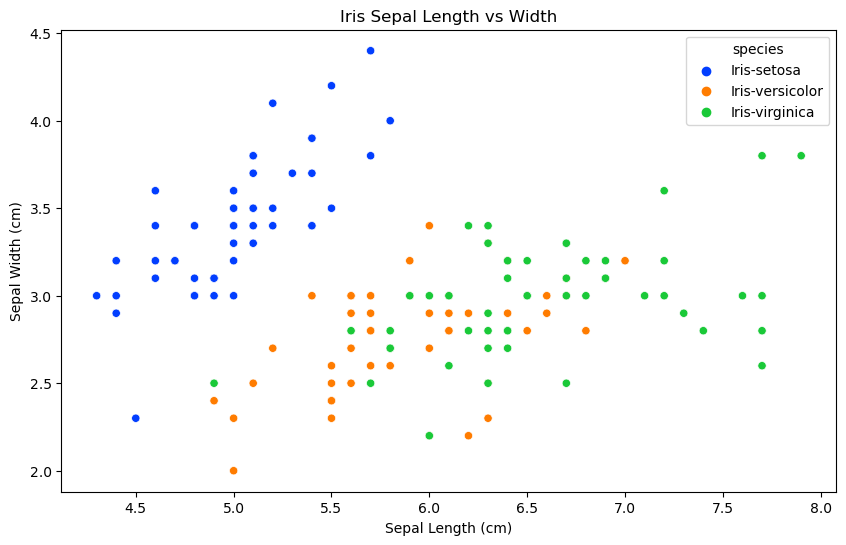

In [29]:
# Ploting the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data, palette='bright')
plt.title('Iris Sepal Length vs Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


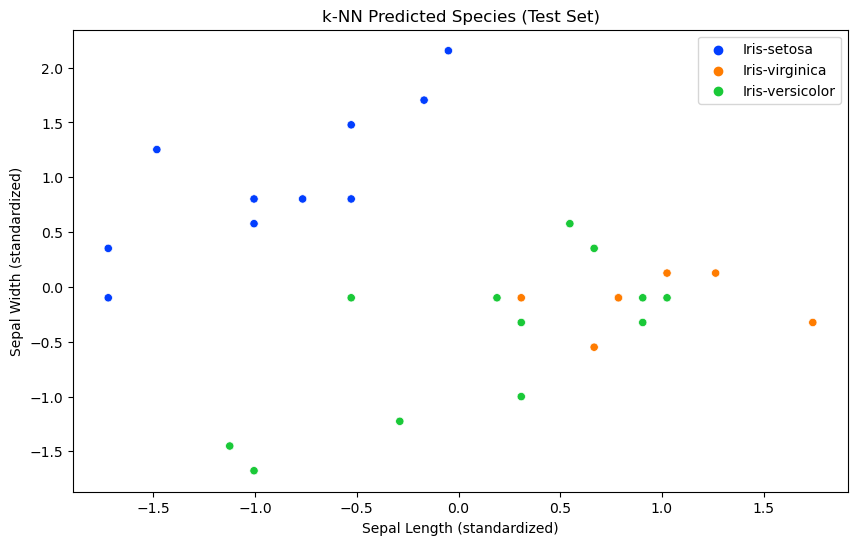

In [30]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='bright')
plt.title('k-NN Predicted Species (Test Set)')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.show()